# Video Game Sales Report
--- 
## Importing Packages and Loading Data

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [75]:
videogames = pd.read_csv("vgsales.csv", index_col = 0) # loading in videogames csv into a dataframe using pandas.read_csv
print(type(videogames)) # checking typing of dataframe

<class 'pandas.core.frame.DataFrame'>


In [76]:
import warnings # removes red boxed future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
# videogames

## Introduction

In this report I am using the Video Games Sales Databse found on [Kaggle](https://www.kaggle.com/gregorut/videogamesales). I elected to use this database because upon inspection I believe I could draw the best conclusions from this data, it had a good balance of categorical data to numerical data, also it helps that I have an interest in Video Games as this led me to enjoy the work I was doing, as I found all conclusions drawn to be very interesting!!

---


### *Contents*
- Cleaning Data
    - Removing Null Values
    - Removing Duplicates
- Data Exploration and Analysis
    1. Most popular platform
    2. Popular brand sales across countries
    3. Nintendo games production year for each console
    4. Popular genres
    5. How sales have changed across the year between Europe and Japan
- Final Conclusions
- Future Ideas
---

## Cleaning Duplicates and Missing Values

In [78]:
videogames.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Text(0.5, 1.0, 'Seaborn heatmap visualising missing data from Videogames dataframe')

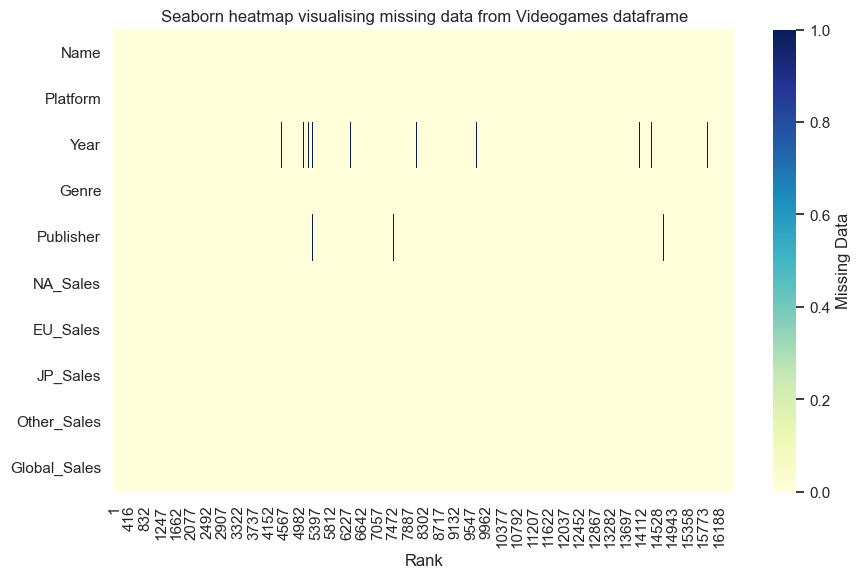

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(videogames.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title("Seaborn heatmap visualising missing data from Videogames dataframe")

In [80]:
dup = videogames.duplicated('Name')
dup.sum()

5105

In [81]:
videogames = videogames.drop_duplicates(['Name'], keep='first')
videogames.duplicated('Name').sum()
videogames1 = videogames.dropna()

Text(0.5, 1.0, 'Seaborn heatmap visualising missing data from Videogames dataframe')

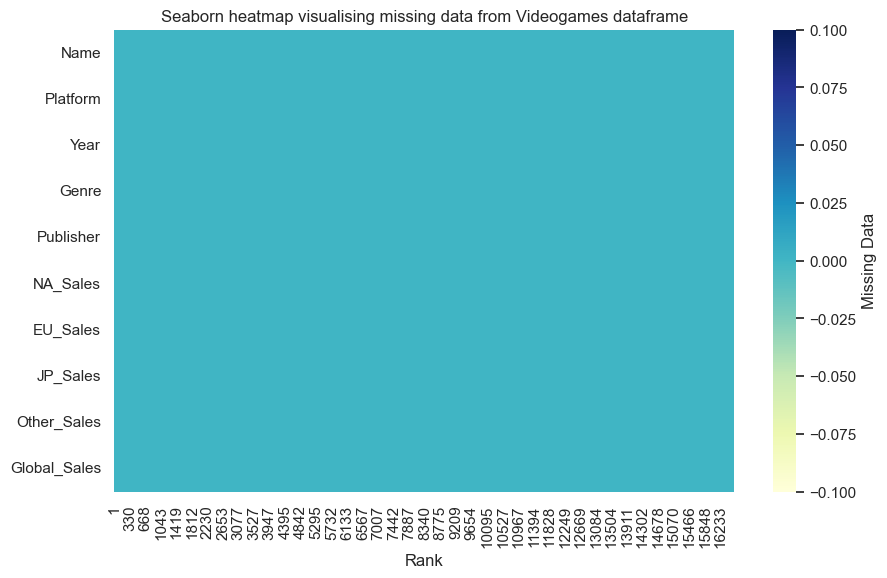

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(videogames1.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title("Seaborn heatmap visualising missing data from Videogames dataframe")

In [83]:
videogames1 = videogames1.drop(videogames1[videogames1['Year']>2015].index)
# videogames1

After completing this review and through designing my last graph I noticed a sever lack of videogame records after 2015, so therefore I decided to remove all records from after 2015, and continue working on the data between 1980-2015.

## Data Exploration and Analysis

In [84]:
videogames1.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


An intial look into the dataframe I am working with to decide what I want to do with it!

### 1. Most Popular Platform

In [85]:
platform_videogames = videogames1.groupby('Platform')
# platform_videogames.describe()

In [102]:
videogame_platforms = videogames1.value_counts('Platform') # counting the number of times a game is made for a platform
videogame_platforms[:3]

Platform
PS2    1831
DS     1780
PS     1117
Name: count, dtype: int64

Looking at only the top 3 in this category

Text(0.5, 1.0, 'A pie chart to which console has seen the most games made for it since 1980')

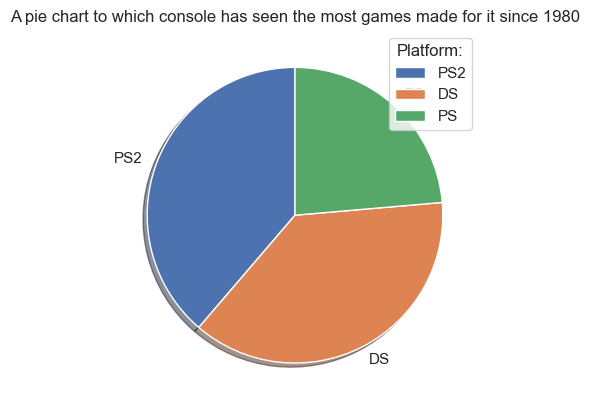

In [108]:
y = videogame_platforms[:3]
plt.pie(y, labels = ["PS2", "DS", "PS"],  startangle = 90, shadow = True)
plt.legend(title = "Platform:")
plt.show
plt.title("A pie chart to which console has seen the most games made for it since 1980")

A simple pie chart only consisiting of the top 3 video game consoles to make it easier to view. As we can see from the large blue section on the left, the largest proportion of videogames made is for the PS2.

### 2. Popular Brand Sales Across Countries 

Text(0.5, 1.0, 'Bar Chart showing global sales of 3 major franchises')

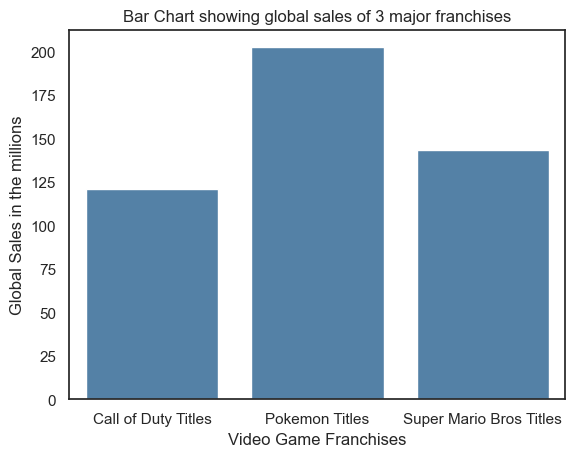

In [106]:
cod = videogames1[videogames1['Name'].str.contains('Call of Duty')]
pokemon = videogames1[videogames1['Name'].str.contains('Pokemon')]
mario = videogames1[videogames1['Name'].str.contains('Super Mario Bros')]
# mario
# cod
# pokemon
# Creating 3 separate dataframes each only containing games with names that have the written 'String' within their Name.

c_sales = cod['Global_Sales'].sum() # summing the number of global sales in each new dataframe
p_sales = pokemon['Global_Sales'].sum()
m_sales = mario['Global_Sales'].sum()

global_sales_comparison = pd.DataFrame(data = {"Call of Duty Titles" : c_sales, "Pokemon Titles" : p_sales,
                                               "Super Mario Bros Titles" : m_sales}, index = [0]) # joining the sums into a dict and then a dataframe
sns.barplot(data = global_sales_comparison, color="steelblue")
plt.xlabel("Video Game Franchises")
plt.ylabel("Global Sales in the millions")
plt.title("Bar Chart showing global sales of 3 major franchises")

As we can see from the bar chart, the most sold out of all 3 of these major video game franchises is Pokemon by a substanial amount of around 75 million copies. I wanted to break this down further and see how these video games are sold differently across the 3 different regions supplied in the Video Games Sales dataframe. This is what I did next:

In [107]:
c_country_sales = {"North-America Sales" : cod['NA_Sales'].sum(), "European Sales": cod['EU_Sales'].sum(), "Japan Sales" : cod['JP_Sales'].sum()}
p_country_sales = {"North-America Sales" : pokemon['NA_Sales'].sum(), "European Sales": pokemon['EU_Sales'].sum(), "Japan Sales" : pokemon['JP_Sales'].sum()}
m_country_sales = {"North-America Sales" : mario['NA_Sales'].sum(), "European Sales": mario['EU_Sales'].sum(), "Japan Sales" : mario['JP_Sales'].sum()}

Here I created three seperate dictionaries with all of the Region Specific sales data inside them, then once done I can better visualise the whole data inside the table seen below.

In [90]:
data = [c_country_sales, p_country_sales, m_country_sales]
area_df = pd.DataFrame.from_dict(data)
area_df.index = ["Call of Duty", "Pokemon", "Mario"]
area_df

,North-America Sales,European Sales,Japan Sales
Call of Duty,66.52,37.89,1.74
Pokemon,79.08,49.71,64.44
Mario,76.01,28.91,31.08


A small dataframe which shows the values of Total Sales (in millions) in Each Region of the three major gaming franchises.

Text(0.5, 1.0, 'A barchart showing the differences in sales of some popular gaming titles')

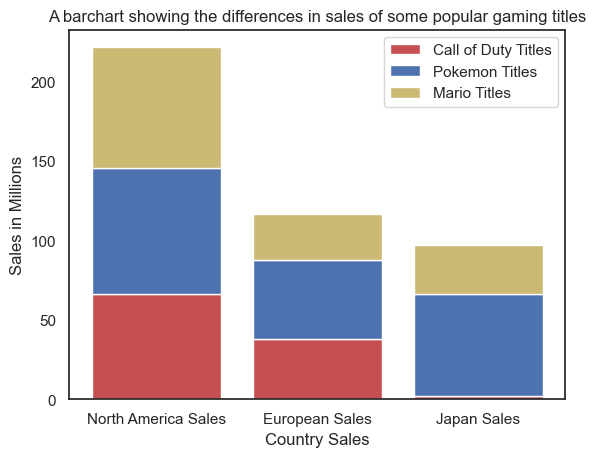

In [91]:
y1 = np.array([cod['NA_Sales'].sum(), cod['EU_Sales'].sum(), cod['JP_Sales'].sum()])
y2 = np.array([pokemon['NA_Sales'].sum(), pokemon['EU_Sales'].sum(), pokemon['JP_Sales'].sum()])
y3 = np.array([mario['NA_Sales'].sum(), mario['EU_Sales'].sum(), mario['JP_Sales'].sum()])
x = ['North America Sales', 'European Sales', 'Japan Sales']
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.xlabel("Country Sales")
plt.ylabel("Sales in Millions")
plt.legend(["Call of Duty Titles", "Pokemon Titles", "Mario Titles"])
plt.title("A barchart showing the differences in sales of some popular gaming titles")

Creating this stacked barchart I had to use Matplotlib and stack each block segement ontop of its prior one, the code can be seen above, I had to create 3 seperate numpy arrays with the data from the Regional Sales table as seen above. Once I created these 3 numpy arrays it was easy, I wrote 3 separate bar charts for each of the arrays and stacked them as I formentioned. 

This barchart shows that the largest portion of all video game sales goes to North American Countries. Second to that are the European countries and finally the smallest number of sales goes to Japan. Looking further into the chart, we can see a large portion of Japan sales goes directly towards Pokemon and matches that of the pokemon sales in NA. Whereas the sale of Call of Duty games in Japan is near 0. Showing which games are more popular in different regions.

### 3. Nintendo games production year for each console

Text(0.5, 1.0, 'A Violin Plot showing the years of game production for each platform from Nintendo')

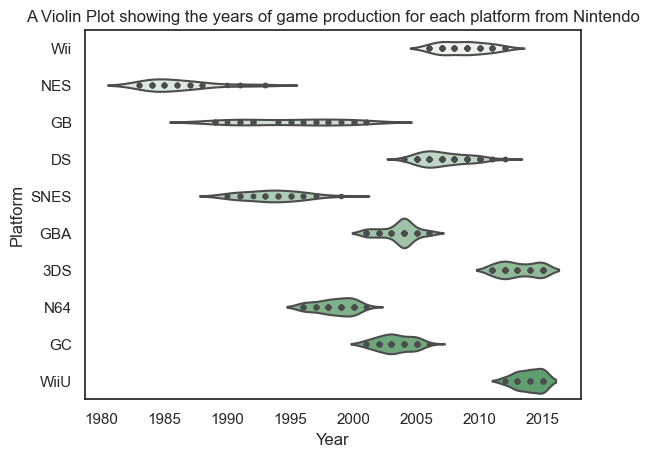

In [92]:
publishers_year = videogames1[["Year", "Publisher", "Platform"]] # creating a separate dataframe with the data I want to present
publishers_year

df_1 = publishers_year.loc[publishers_year['Publisher'].eq('Nintendo')] # using loc to extract only rows which have the publisher Nintendo
sns.violinplot(data = df_1, x = "Year", y = "Platform", palette="light:g", inner="points", orient="h")
plt.title("A Violin Plot showing the years of game production for each platform from Nintendo")

This Violin Plot accurently represens the active years of each console, the wider the bubble the more games were released  for tht console in that given time. I find the longevity of the gameboy very interesting as its used spanned over 20 years, in more recent times its apparent there are far more game consoles and more games being created, this is visualised as more lines and thicker bubbles on the chart.

### 4. Popular genres

In [93]:
games = pd.read_csv("vgsales.csv") # I want the column 'Rank' inside the dataframe and not used as the index
videogame_genre = games.groupby("Genre")
df_d = videogame_genre.describe()
# df_d

In [109]:
df_s = videogame_genre.sum()
df_new = pd.concat([df_d, df_s], axis=1) # joining the two dataframes with contain the number of copies sold and the cumulative rank
#df_new

In [110]:
## Trying to add another column where the overall sum of ranks is divided the number of videogames made
df_new['Mean'] = (df_new['Rank']/df_new[('Rank', 'count')])/1000
#df_new

In [111]:
# df_new.columns.values.tolist() # to find the column names of df_new

C:\Users\killi\AppData\Local\Temp\ipykernel_28380\2156767378.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="Mean", y="Genre", data=df_new, size="Rank", sizes=(40, 200), alpha=.5, palette="muted",
C:\Users\killi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Scatterplot showing which genres are sold most (Average Ranks)')

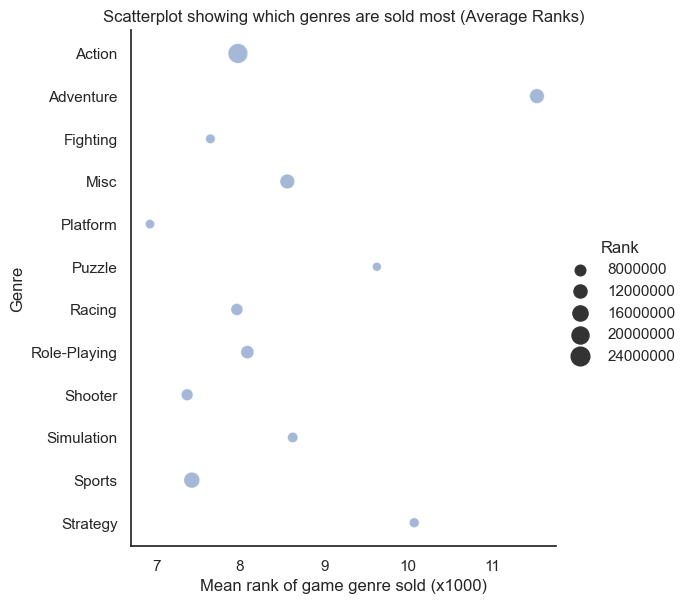

In [112]:
sns.relplot(x="Mean", y="Genre", data=df_new, size="Rank", sizes=(40, 200), alpha=.5, palette="muted",
            height=6)
sns.set_theme(style="white")
plt.xlabel("Mean rank of game genre sold (x1000)")
plt.ylabel("Genre")
plt.title("Scatterplot showing which genres are sold most (Average Ranks)")

I created this scatterplot as I wanted to visualise the popularity of genres, I totalled cumulative rank for each genre and divided that by the number of games made for each genre, returning to me an average, so therefore the closer the point on the graph is to the y axis the more popular that game genre is. I think a more suitable scale axis would have been to rank these genres 1-10 based on their popularity. Also the Rank scale on the right side of the graph, indicates the number of copies sold for each game genre. So we can see that genres such as Action and Sports have had the most games made. 

### 5. How sales have changed across the year between Europe and Japan

In [113]:
df_action = videogames1.loc[videogames1['Genre'].eq('Action')]
df_platform = videogames1.loc[videogames1['Genre'].eq('Platform')]
df_sports = videogames1.loc[videogames1['Genre'].eq('Sports')]
df_with_genres = pd.concat([df_action, df_platform, df_sports])
df_with_genres
df_year = df_with_genres[["Year", "Genre", "EU_Sales", "JP_Sales"]]

<Axes: xlabel='Year'>

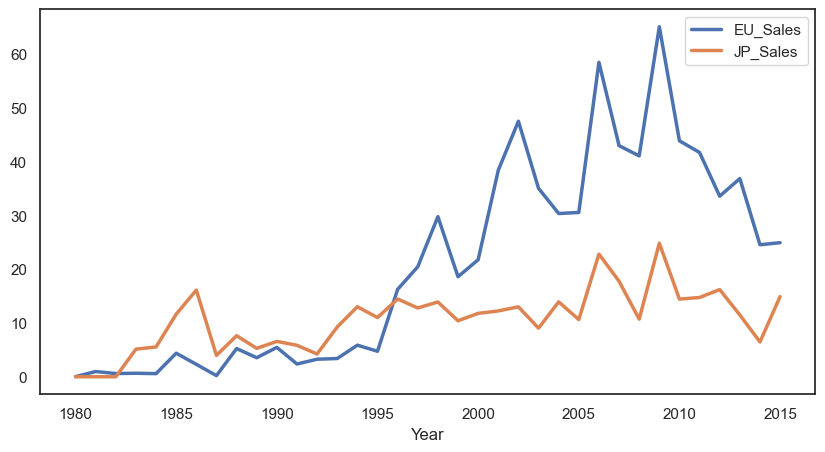

In [114]:
df_year_grouped = df_year.groupby("Year")
sum_df = df_year_grouped.sum()
sum_df['Year'] = sum_df.index
sum_df.plot(x='Year', y=['EU_Sales', 'JP_Sales'], figsize=(10,5), linewidth = 2.5)

This line graph shows how the sales of Video Games has changed over the last 35 years between Japan and European countries. I chose these two as they were the closest in values and would provide the best comparison. As we can see it looks like Japan took an early lead in the video game industry, accumlating more sales than the population of Europe, however around 1995 the video game industry clearly made a hit with Europe and we can see the dramatic increase in sales shortly adter that year. The fall off at the end of the graph is due to the collection of Data. The Video Game Sale Dataframe was finished in 2016 and uploaded, I believe some of their recordings and measurements in 2015 were therefore rushed or misplaced. 

### Final Conclusions

- Platform based and adventures titles are more popular in Japan than FPS (First Person Shooters)
- The overall sales of NA trump those of EU and Japan.
- Action, Sports and Adventure are three of the most popular gaming genres between 1985-2015.
- Gaming platforms tend to have shorter lifespans and popular circulations now, this is seen in Graph 3, where we can see the period of activity time seen by older consoles is greater than that of new.

### Future Ideas

- I would like to attempt to average out the NA, EU and Japan sales columns using their population data, to find which regions actually had more game sales per capita, rather than comparing a country like Japan to two continents.
- I would like to incorporate better imagery into my graphs, perhaps animate a couple, play with the colour scales more so they stand out.
- I would like to work on a bigger database too, with more recent data, so I can compare old trends between 1980-2000, with new trends seen between 2000-2020. I think an analysis of these two would provide great insights into how the sales of the Video Game Industry is changing. 